<a href="https://colab.research.google.com/github/beck1538/Amigas2023/blob/main/7.20%20Morning%20Multistate_linearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Date: July 19, 2023
#Authors:
#description:
#Add the three datasets: National_data.clsx,....

#%% Packages and Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import plotly.graph_objects as go

#load the datasets
Monthly_Regional_EHS_df=pd.read_excel("Regional_EHS.xlsx") #Regional EHS collected MONTHLY
Monthly_State_HPI_df=pd.read_excel("State_HPI.xlsx", sheet_name ='Core_Logic_State_HPI') #Statewise HPI collected MONTHLY
National_data_df=pd.read_excel("National_data.xlsx")


In [ ]:
#Rescale Monthly_Regional_EHS_df to match
for i in range (1,6):
    Monthly_Regional_EHS_df[Monthly_Regional_EHS_df.columns[i]]= Monthly_Regional_EHS_df[Monthly_Regional_EHS_df.columns[i]] /1000


In [ ]:
#rename the columns
Monthly_State_HPI_df = Monthly_State_HPI_df.rename(columns = {'EOM':'Date'})
Monthly_State_HPI_df['Date'] = pd.to_datetime(Monthly_State_HPI_df['Date'])


In [ ]:
# remove data prior to 1976
Monthly_State_HPI_df = Monthly_State_HPI_df[Monthly_State_HPI_df['Date'].dt.year >= 1976]


In [ ]:
#set the date as the index for the dataframes and restrict to 2000 data
#Just trying to figure it out where we saw it fit better
Monthly_State_HPI_df.set_index('Date', drop= True, inplace = True)
National_data_df.set_index('Date', drop= True, inplace = True)
Monthly_Regional_EHS_df.set_index('Date', drop= True, inplace = True)

Monthly_State_HPI_df = Monthly_State_HPI_df[Monthly_State_HPI_df.index.year >= 2000]
National_data_df = National_data_df[National_data_df.index.year >= 2000]
Monthly_Regional_EHS_df = Monthly_Regional_EHS_df[Monthly_Regional_EHS_df.index.year >= 2000]

#Make everything start and end at the same time
Monthly_State_HPI_df = Monthly_State_HPI_df[Monthly_State_HPI_df.index <= '2023-03-31']
National_data_df = National_data_df[National_data_df.index <= '2023-03-31']
Monthly_Regional_EHS_df =  Monthly_Regional_EHS_df[Monthly_Regional_EHS_df.index <= '2023-03-31']


In [ ]:
# this function inputs a state and returns the region
def get_region(state):
    for region, states in regions_dic.items():
        if state in states:
            return region


In [ ]:

#Dictionary for the regions
#We put DC in Northest and DE in South so that it was defined in our directory and our function could run
regions_dic = {
    'Northeast': {'DC','CT', 'ME', 'MA', 'NH', 'NJ', 'NY', 'PA', 'RI', 'VT'},
    'Midwest': {'IL', 'IN', 'IA', 'KS', 'MI', 'MN', 'MO', 'OH', 'ND', 'NE', 'SD', 'WI'},
    'South': {'DE', 'AL', 'AR', 'FL', 'GA', 'KY', 'LA', 'MD', 'MS', 'NC', 'OK', 'SC', 'TN', 'TX', 'VA', 'WV'},
    'West': {'AK', 'AZ', 'CA', 'CO', 'HI', 'ID', 'MT', 'NV', 'NM', 'OR', 'UT', 'WA', 'WY'}
}


In [ ]:
 # In this class, the inputs  are two predictors and one response variable. The function fit applies a linear regression to y and X1 and X2.
# To gets the coefficients, use the method get_linCoeff. To obtain the predictions indexed with the 'y' indices, use get_predictions_yIndices (this is usuful to plot the predictions as a function of time if y is indexed by dates)

class LinearRegressionEstimator:
    def __init__(self, y, X1, X2):
        self.y = y
        self.X1 = X1
        self.X2 = X2
        self.est = None  # Initialize the estimator attribute

    def fit(self):
        X = np.column_stack([self.X1, self.X2])
        Xi = sm.add_constant(X)  # add intercept
        OLS = sm.OLS(np.array(self.y), Xi)
        self.est = OLS.fit()

    def get_linCoeff(self):
        coefficients = self.est.params

        return coefficients

    def get_estimator(self):
        return self.est

    def get_predictions(self):
        linear_model = self.est.predict()
        rmse = np.sqrt(np.mean((self.y - linear_model) ** 2))

        return pd.Series(data=linear_model,index=self.y.index)

    # y index for dates
    def get_predictions_yIndices(self):
        linear_model = self.est.predict()
        rmse = np.sqrt(np.mean((self.y - linear_model) ** 2))

        return pd.Series(data=linear_model,index=self.y.index)





In [ ]:
#WMA and Lin are used to make weighted moving averages of time series variables, like demand for instance
def wma(varb, wght):
    if np.shape(wght)==():
        varbs=varb
    else:
        wght=np.flip(wght,axis=0)
        vrbh=np.convolve(varb, wght, 'valid') / np.sum(wght)
        varbs=varb*[np.nan]
        varbs[len(wght)-1:]=vrbh
    return varbs
def lin(xx):
    if xx>0:
        line=np.r_[1:xx+1]
    elif xx<0:
        line=np.r_[xx:0]
    return line


In [ ]:
# Existing Home inventory at the National level.
EHI_US = National_data_df['EHI']

def get_regional_sales(region):
    column_name = f'EHS_{region} Region'
    return Monthly_Regional_EHS_df[column_name]

In [ ]:
def get_State_HPI(state):
    column_name = f'HPICLUSIDX_{state} State'
    return Monthly_State_HPI_df[column_name]



[-10.31855061   0.1747461   -0.02011575] AK


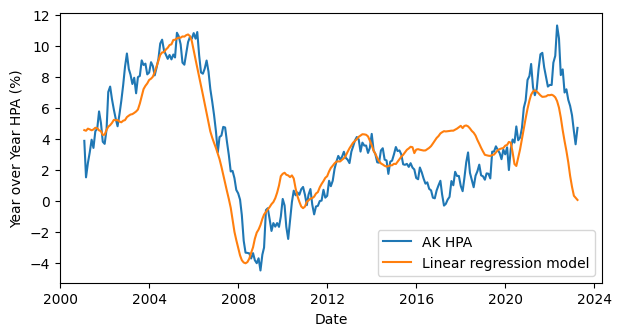

<Figure size 7680x5760 with 0 Axes>

[-12.86199199   0.12316722  -0.02969236] AL


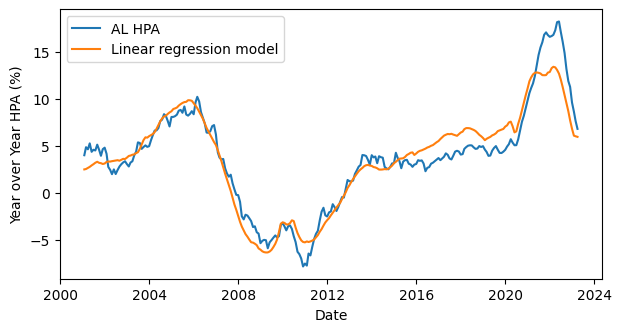

<Figure size 7680x5760 with 0 Axes>

[-6.12719668  0.08884802 -0.0291467 ] AR


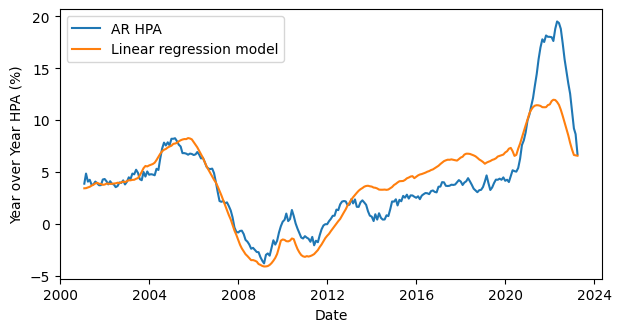

<Figure size 7680x5760 with 0 Axes>

[-25.45752701   0.53589315  -0.10964842] AZ


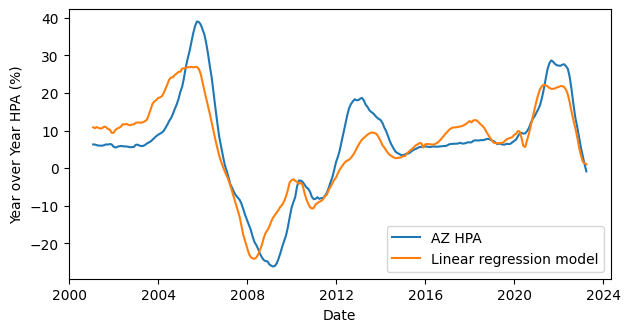

<Figure size 7680x5760 with 0 Axes>

[-22.1006664    0.47028187  -0.09425752] CA


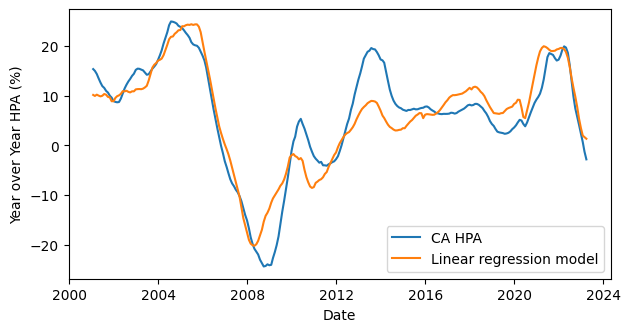

<Figure size 7680x5760 with 0 Axes>

[13.69680468  0.05507439 -0.06175178] CO


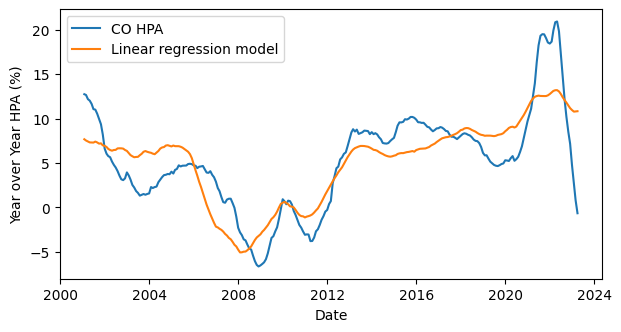

<Figure size 7680x5760 with 0 Axes>

[-7.16869562  0.3565075  -0.04836468] CT


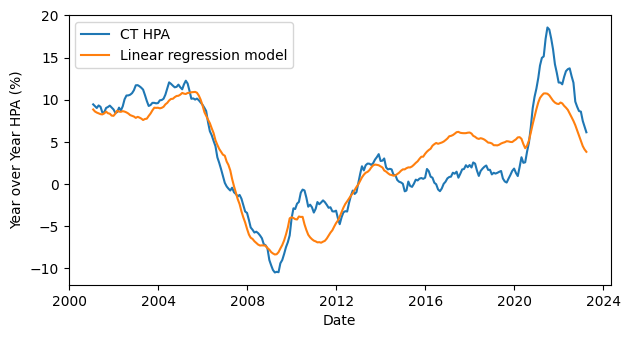

<Figure size 7680x5760 with 0 Axes>

[-15.11337818   0.41407474  -0.0184794 ] DC


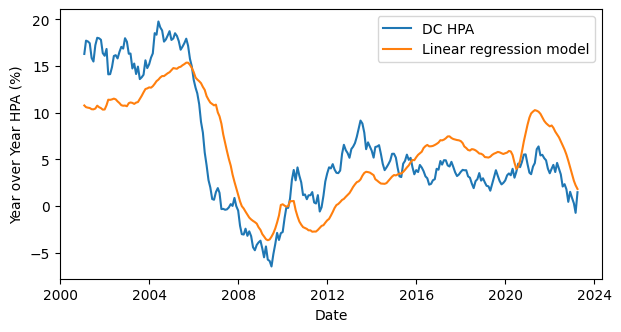

<Figure size 7680x5760 with 0 Axes>

[-21.14158196   0.16186717  -0.02310453] DE


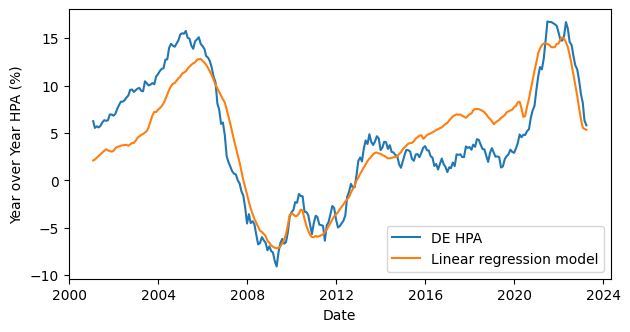

<Figure size 7680x5760 with 0 Axes>

[-21.44720506   0.23326543  -0.070433  ] FL


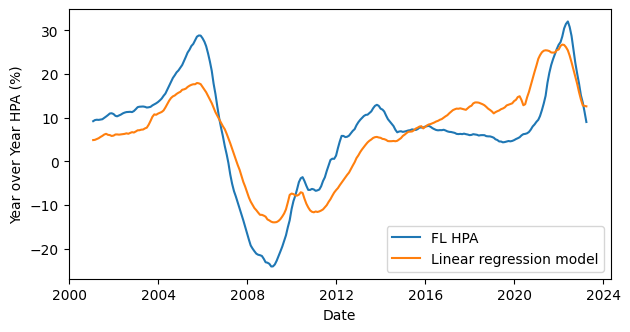

<Figure size 7680x5760 with 0 Axes>

[-0.36176087  0.09896288 -0.06107104] GA


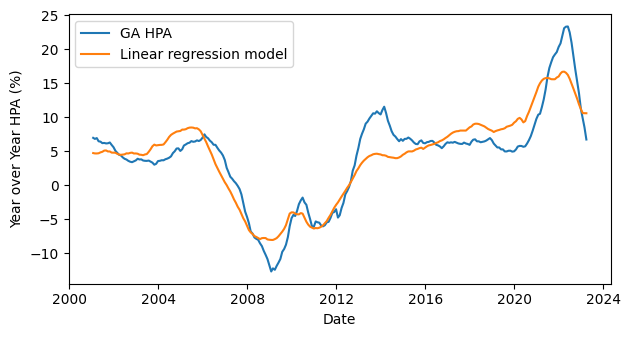

<Figure size 7680x5760 with 0 Axes>

[-28.1714337    0.43888736  -0.05231576] HI


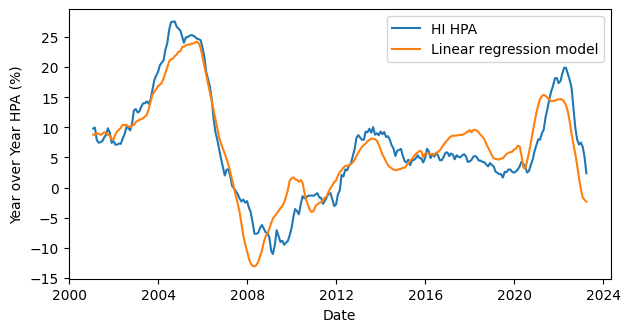

<Figure size 7680x5760 with 0 Axes>

[ 2.14693019  0.06319075 -0.02717566] IA


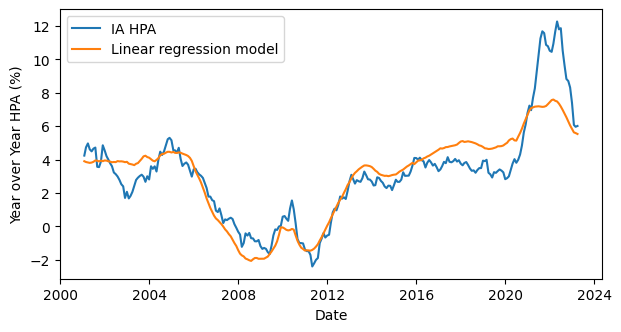

<Figure size 7680x5760 with 0 Axes>

[-6.42251058  0.29448388 -0.08056635] ID


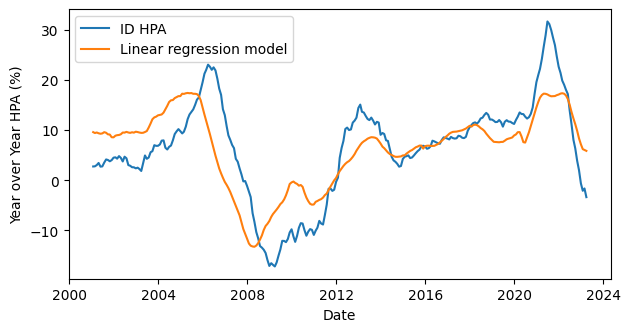

<Figure size 7680x5760 with 0 Axes>

[-15.99956446   0.23313664  -0.03401467] IL


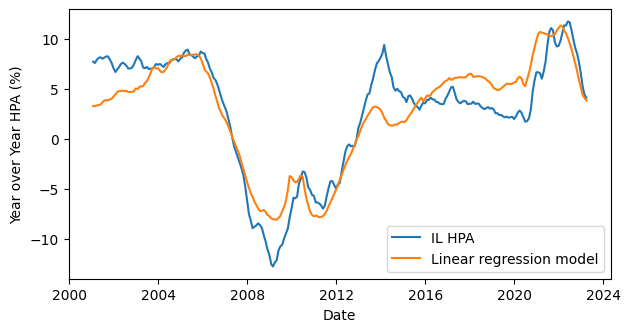

<Figure size 7680x5760 with 0 Axes>

[ 7.1694051   0.07054723 -0.0514628 ] IN


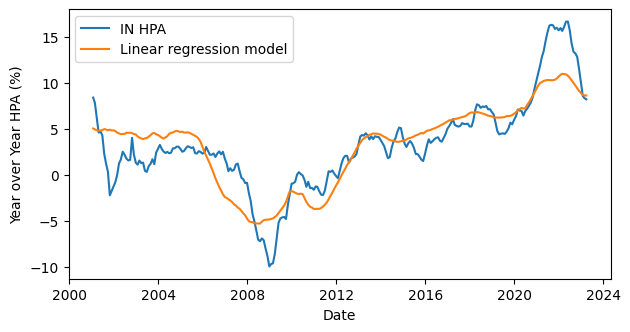

<Figure size 7680x5760 with 0 Axes>

[-1.5814207   0.10817055 -0.03156158] KS


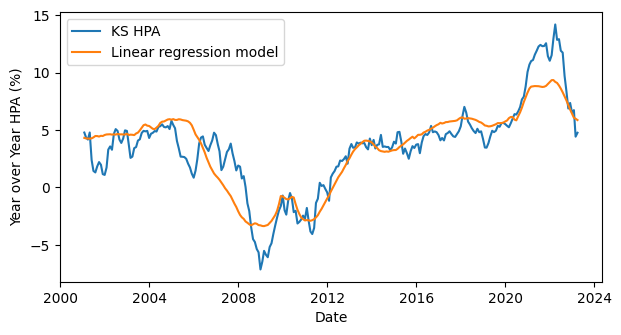

<Figure size 7680x5760 with 0 Axes>

[ 0.44753878  0.0577704  -0.03418437] KY


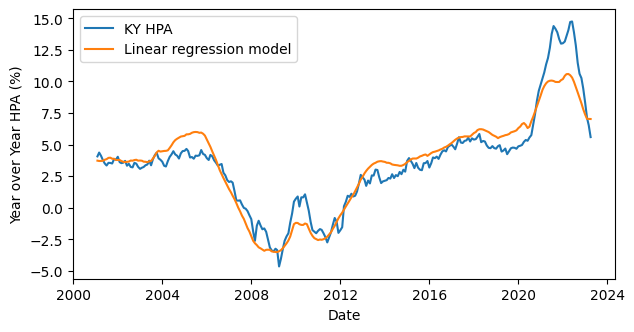

<Figure size 7680x5760 with 0 Axes>

[-1.28198758e+01  9.25305007e-02 -3.80398473e-03] LA


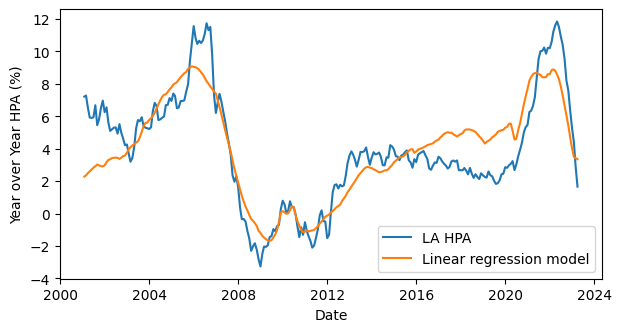

<Figure size 7680x5760 with 0 Axes>

[ 6.28420849  0.20225467 -0.05996161] MA


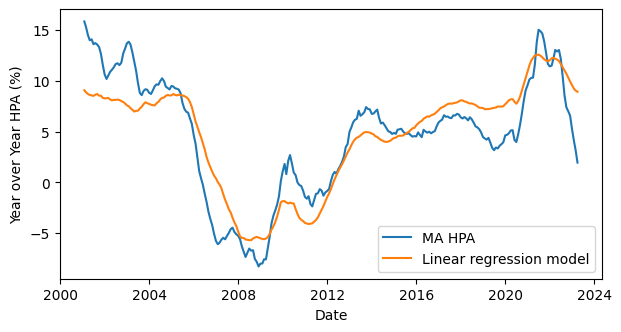

<Figure size 7680x5760 with 0 Axes>

[-2.79809946e+01  1.94601995e-01 -1.86593404e-02] MD


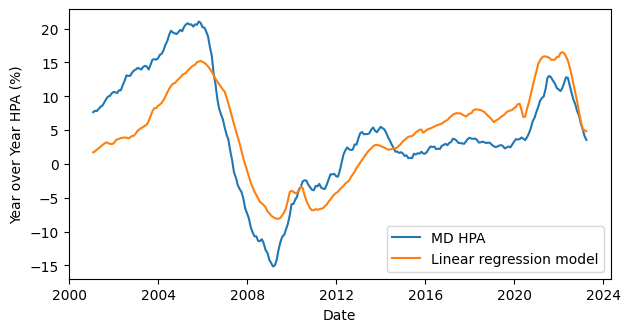

<Figure size 7680x5760 with 0 Axes>

[ 2.31087286  0.28433338 -0.06117595] ME


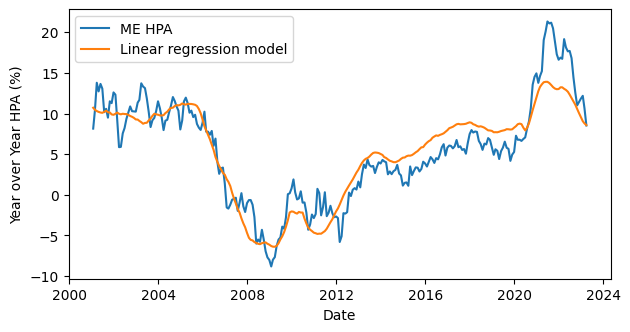

<Figure size 7680x5760 with 0 Axes>

[21.2975828   0.02628952 -0.09119461] MI


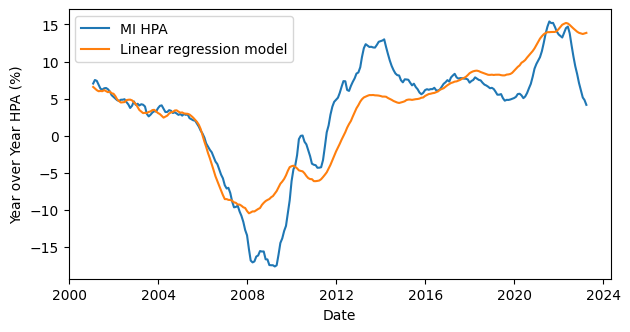

<Figure size 7680x5760 with 0 Axes>

[-2.08391753  0.15898166 -0.05176687] MN


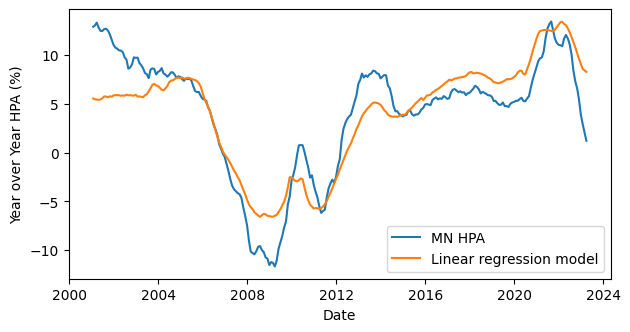

<Figure size 7680x5760 with 0 Axes>

[-3.49897579  0.14754219 -0.04236604] MO


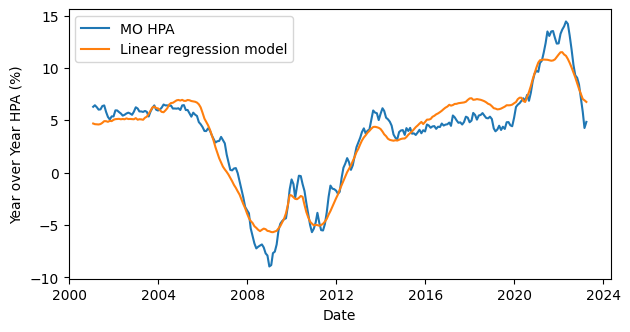

<Figure size 7680x5760 with 0 Axes>

[-7.51859819  0.08955045 -0.02866964] MS


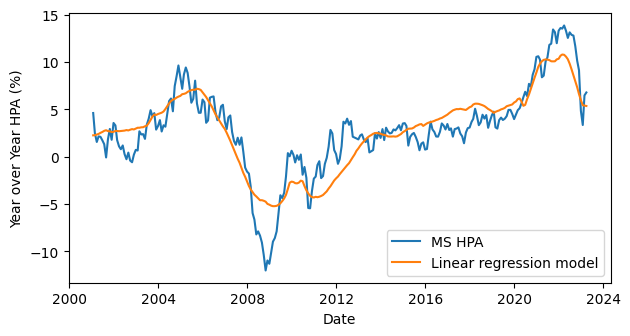

<Figure size 7680x5760 with 0 Axes>

[-3.50751936  0.196209   -0.05023123] MT


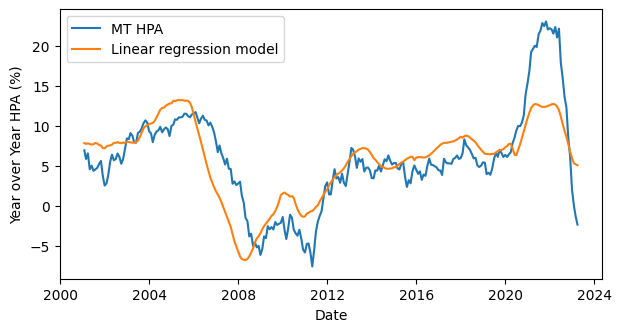

<Figure size 7680x5760 with 0 Axes>

[-8.57410433  0.11129101 -0.03510959] NC


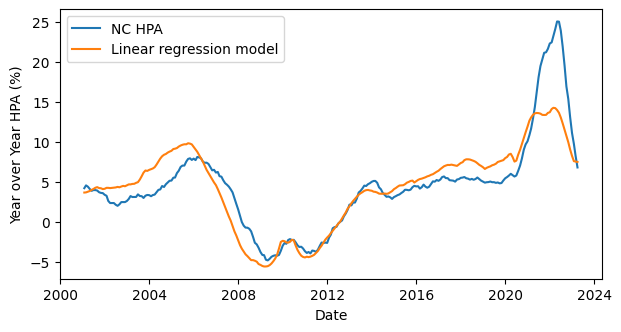

<Figure size 7680x5760 with 0 Axes>

[ 3.26925475  0.02061358 -0.00589294] ND


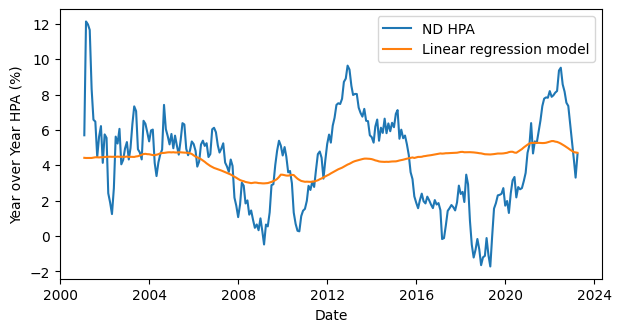

<Figure size 7680x5760 with 0 Axes>

[ 5.95410992  0.05459406 -0.03666662] NE


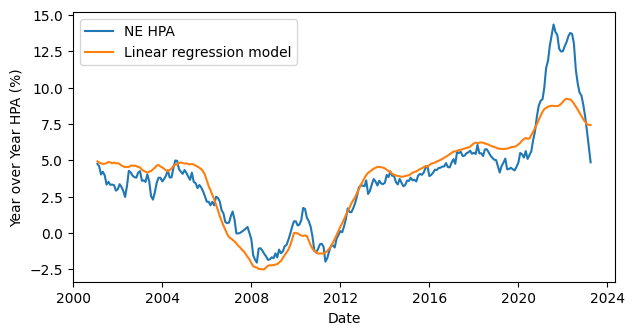

<Figure size 7680x5760 with 0 Axes>

[ 4.84822535  0.27081978 -0.07032222] NH


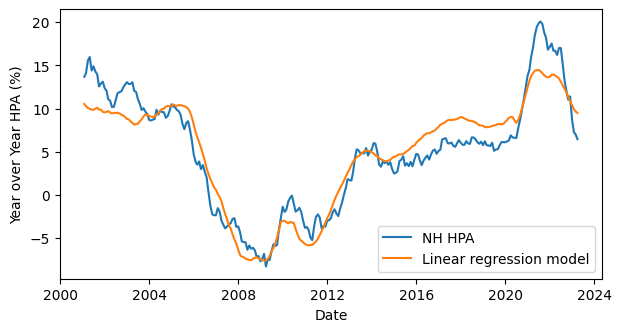

<Figure size 7680x5760 with 0 Axes>

[-9.9957227   0.43243648 -0.05157381] NJ


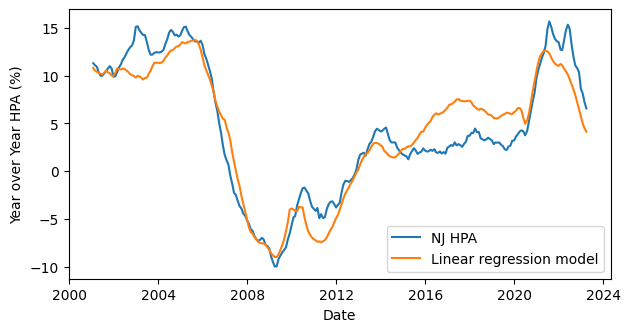

<Figure size 7680x5760 with 0 Axes>

[-7.90081923  0.20735165 -0.04456743] NM


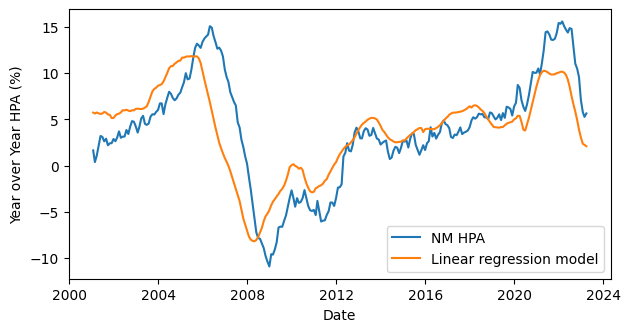

<Figure size 7680x5760 with 0 Axes>

[-24.34954522   0.56590351  -0.13013817] NV


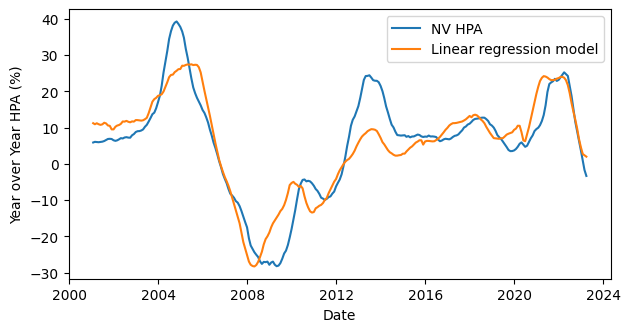

<Figure size 7680x5760 with 0 Axes>

[-10.51579548   0.34928418  -0.0269859 ] NY


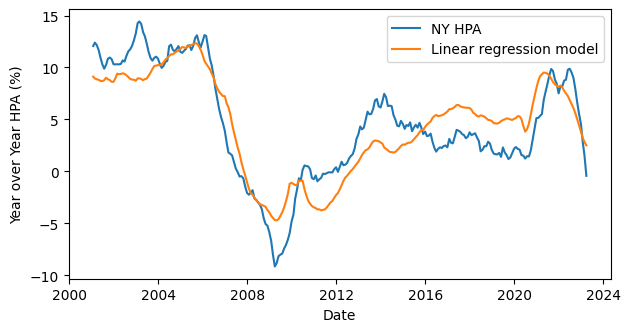

<Figure size 7680x5760 with 0 Axes>

[ 7.08847881  0.07509389 -0.05406642] OH


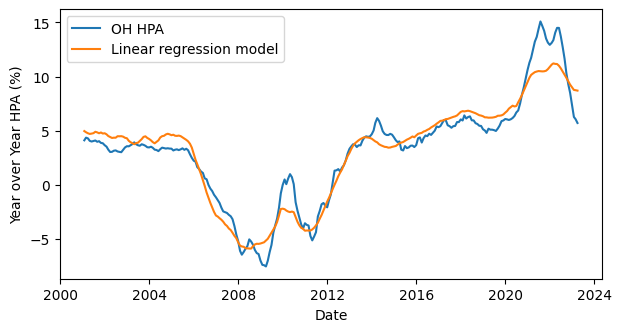

<Figure size 7680x5760 with 0 Axes>

[-3.06376788  0.05931238 -0.01969915] OK


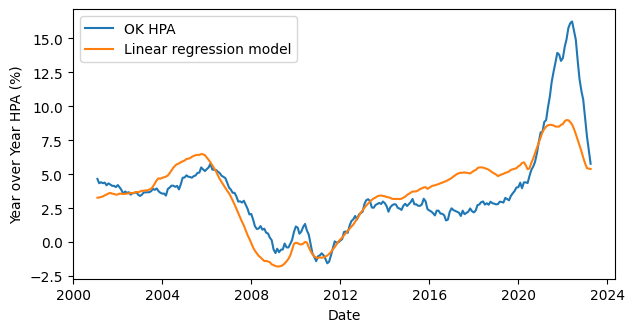

<Figure size 7680x5760 with 0 Axes>

[-11.89242894   0.28877722  -0.05681713] OR


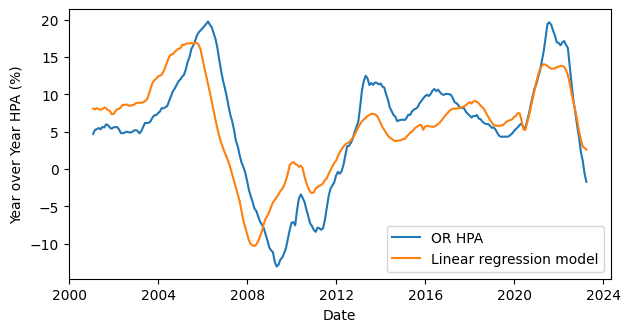

<Figure size 7680x5760 with 0 Axes>

[-5.06866226  0.28998702 -0.03592582] PA


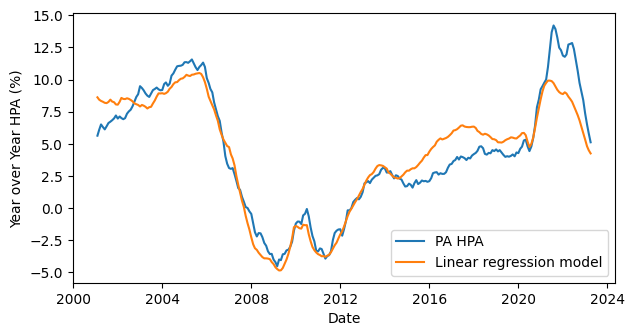

<Figure size 7680x5760 with 0 Axes>

[-2.90098319  0.42930255 -0.07689367] RI


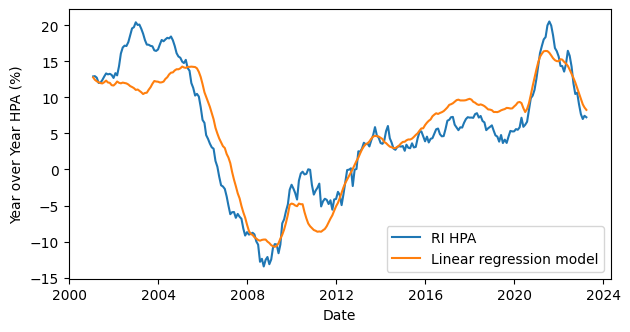

<Figure size 7680x5760 with 0 Axes>

[-13.98092284   0.14600034  -0.03881612] SC


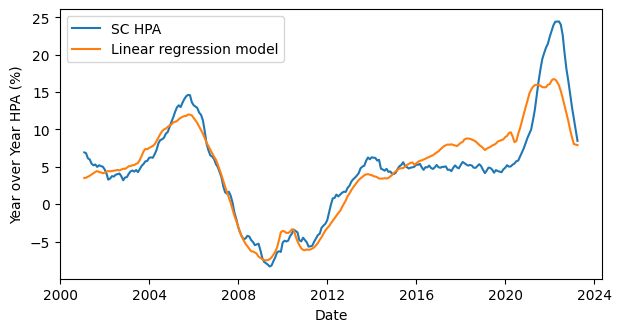

<Figure size 7680x5760 with 0 Axes>

[ 4.11319639  0.07294908 -0.03368759] SD


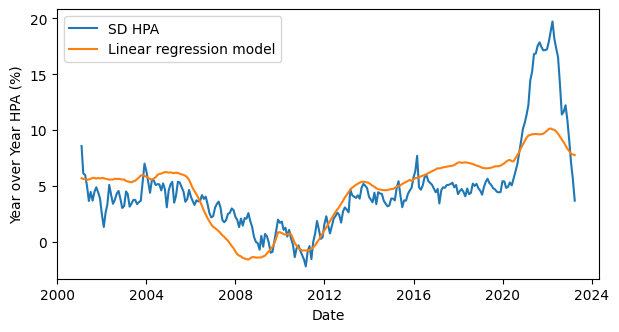

<Figure size 7680x5760 with 0 Axes>

[-5.22358085  0.10754997 -0.04326782] TN


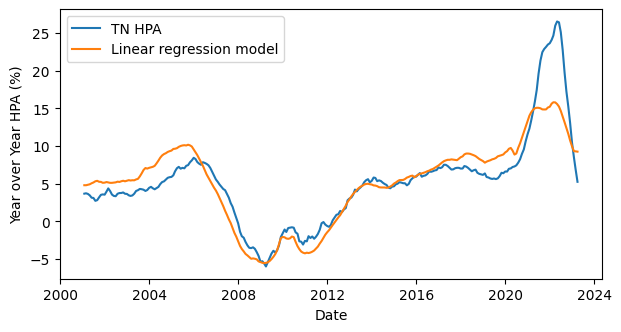

<Figure size 7680x5760 with 0 Axes>

[ 2.71249774  0.05664132 -0.03853078] TX


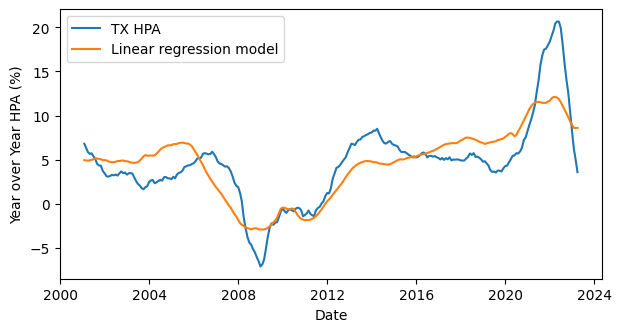

<Figure size 7680x5760 with 0 Axes>

[ 0.29271184  0.1771576  -0.05829865] UT


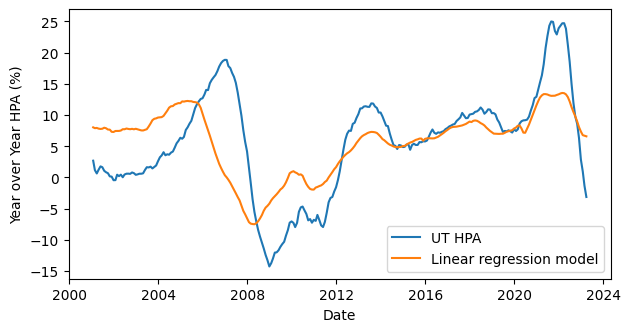

<Figure size 7680x5760 with 0 Axes>

[-12.49708666   0.1360551   -0.03570045] VA


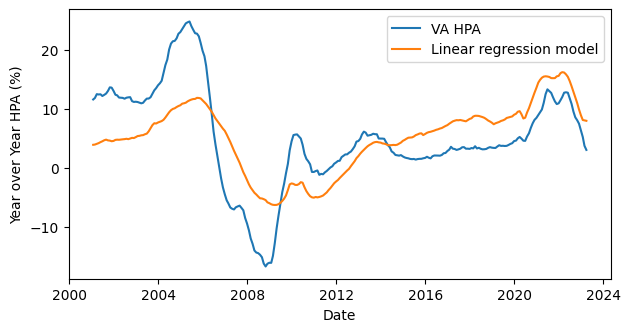

<Figure size 7680x5760 with 0 Axes>

[-1.02185921  0.28061958 -0.0469765 ] VT


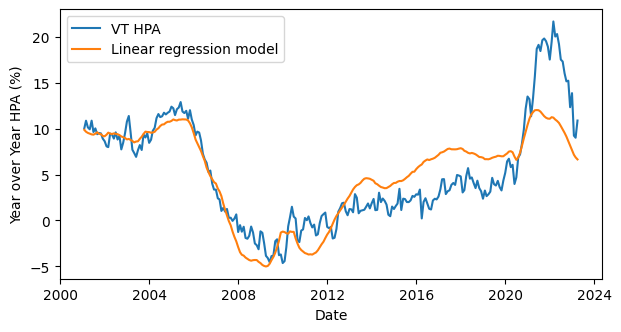

<Figure size 7680x5760 with 0 Axes>

[-9.60602877  0.27826737 -0.05987967] WA


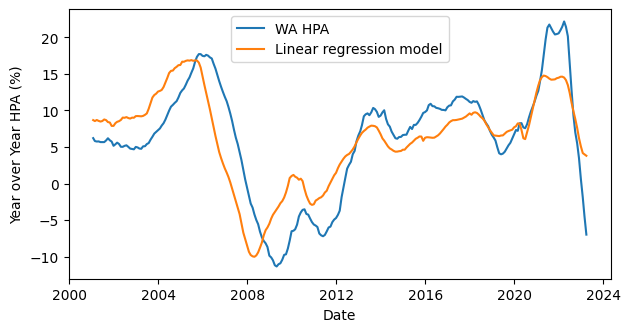

<Figure size 7680x5760 with 0 Axes>

[-5.07440175  0.15640471 -0.03842768] WI


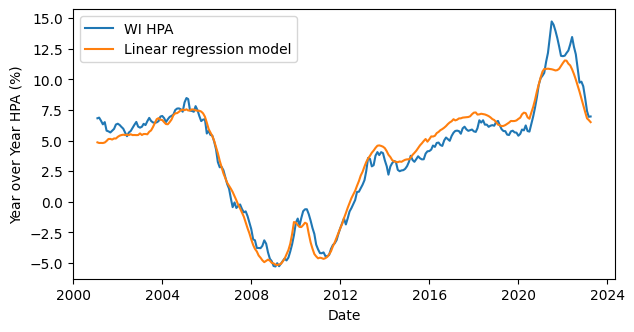

<Figure size 7680x5760 with 0 Axes>

[-18.19541673   0.14199942  -0.01935551] WV


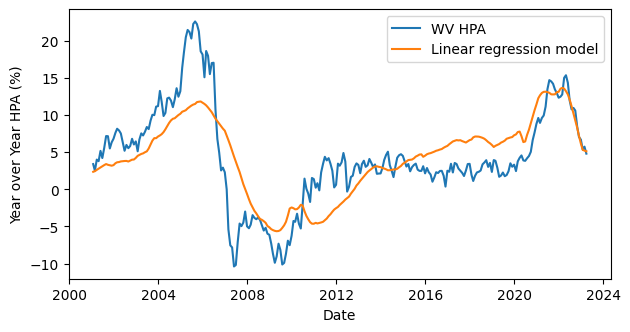

<Figure size 7680x5760 with 0 Axes>

[-7.68108     0.16751365 -0.02475799] WY


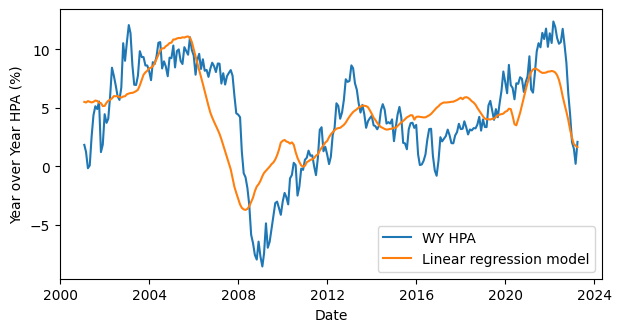

<Figure size 7680x5760 with 0 Axes>

In [12]:
# run a loop through all the columns of Monthly_State_HPI_df (every column corresponds to a state and its give its HPI)

for i in range (len(Monthly_State_HPI_df.columns)):
  state_HPI = Monthly_State_HPI_df[Monthly_State_HPI_df.columns[i]]
  #convert to HPA
  state_HPA = 100*(state_HPI-state_HPI.shift(12))/(state_HPI.shift(12))
  #get the state name
  state_name = Monthly_State_HPI_df.columns[i][-2:]
  # get the region
  region_name = get_region(state_name)
  # get the regional Existing home sales
  regional_EHS = Monthly_Regional_EHS_df['EHS_' + region_name + ' Region']

  # Apply linear regression to the state
  y = state_HPA[state_HPA.index.year >= 2001]
  X1 = wma((regional_EHS),lin(12))[wma((regional_EHS),lin(12)).index.year >= 2001]
  X2 = wma((EHI_US),lin(12))[wma((EHI_US),lin(12)).index.year >= 2001]
  linearModel = LinearRegressionEstimator(y, X1, X2)
  linearModel.fit()
  coeffs = linearModel.get_linCoeff()
  predictions = linearModel.get_predictions_yIndices()
  print(coeffs, state_name)


  #%% Plot the linear model on a time line
  fig = plt.figure(figsize = (7,3.5))
  plt.plot(y)
  plt.plot(predictions)
  plt.xlabel("Date")
  plt.ylabel("Year over Year HPA (%)")
  leg = [f'{state_name} HPA', 'Linear regression model']
  plt.legend(leg)
  plt.figure(dpi = 1200)
  plt.show()



In [12]:
regional_EHS

In [ ]:
wma((regional_EHS),lin(12))

Date
2000-01-31         NaN
2000-02-29         NaN
2000-03-31         NaN
2000-04-30         NaN
2000-05-31         NaN
                ...   
2022-11-30    0.812179
2022-12-31    0.771538
2023-01-31    0.738462
2023-02-28    0.729744
2023-03-31    0.720256
Name: EHS_West Region, Length: 279, dtype: float64